# 제안분포의 scale parameter s를 0.1, 0.5, 100으로 시험하면서 다음의 양들을 얻어라

- acceptance ratio : 제안 분포에서 추출된 샘플을 수용하는 비율
- 자기상관함수 도표 : 샘플 간의 자기상관을 시각화하여 샘플 간의 상관 관계를 확인한다. 자기상관함수는 시간에 따라 샘플 간의 연관성
- 상관시간 : 샘플 간의 상관관계가 얼마나 지속되는지를 나타내며, 샘플링 과정의 자유도와 관련

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series

In [2]:
def p(x) : 
    # return 1 / np.sqrt(1/2*np.pi) * np.exp(-x**2 / 2)
    return np.exp(-x**2 / 2) #앞에 상수를 버리고, exp()부분만 넣어도 된다.
def alpha(x, x_star) :
    return min(1, (p(x_star) * q(x, x_star)) / (p(x) * q(x_star, x)))

# s = 0.1

In [4]:
# s = 0.1인 상황
def q(x, x_star, s = 0.1) :
    return 1/s * np.exp( -(x-x_star) / s) * np.exp( -np.exp( -(x-x_star)/s))

0.7416


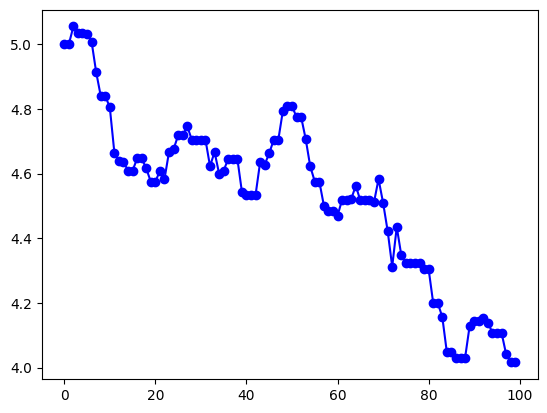

In [5]:
T = 10000
x = 5
x_list = [5]
count = 0

for i in range(T):
    x_star = np.random.gumbel(x ,0.1) # q(x) 함수에서 뽑을거
    u = np.random.uniform(0,1)
    if u <= alpha(x, x_star) :
        x_list.append(x_star)
        x = x_star
        count += 1
    else :
        x_list.append(x)
        
accept_0_1 = count / T
print(accept_0_1)

plt.plot(x_list[:100],'bo-')  #burn-in 제외하고 그리기
plt.show()

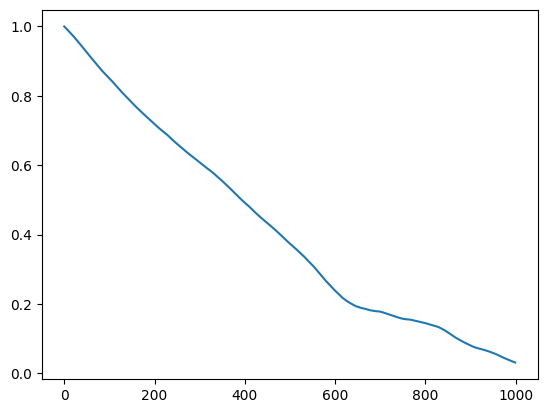

In [6]:
# 자기 상관 함수
S = Series(x_list)

acf_0_1 = []
for k in range(0, 1000) :
    acf_0_1.append(S.autocorr(k))
plt.plot(acf_0_1 )

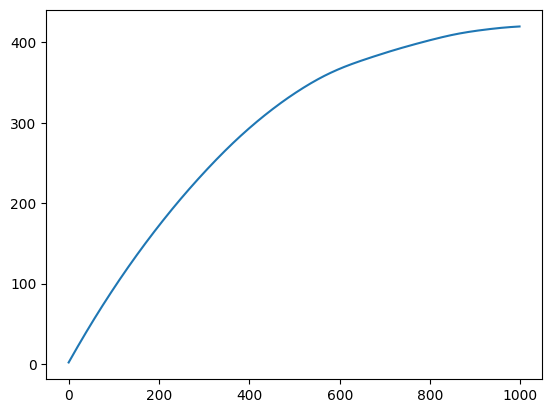

In [7]:
# 상관시간
tau_0_1 = []
tau = S.autocorr(0)
for k in range(1,1000) :
    tau += S.autocorr(k)
    tau_0_1.append(tau)
# print(tau_0_1)
plt.plot(tau_0_1)

# s = 0.5

In [8]:
# s = 0.5인 상황
def q(x, x_star, s = 0.5) :
    return 1/s * np.exp( -(x-x_star) / s) * np.exp( -np.exp( -(x-x_star)/s))

0.6981


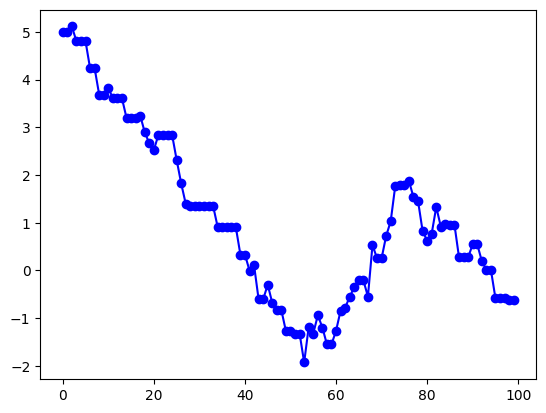

In [9]:
T = 10000
x = 5
x_list = [5]
count = 0

for i in range(T):
    x_star = np.random.gumbel(x ,0.5) # q(x) 함수에서 뽑은거
    u = np.random.uniform(0,1)
    if u <= alpha(x, x_star) :
        x_list.append(x_star)
        x = x_star
        count += 1
    else :
        x_list.append(x)

accept_0_5 = count / T
print(accept_0_5)

plt.plot(x_list[:100],'bo-')  #burn-in 제외하고 그리기
plt.show()

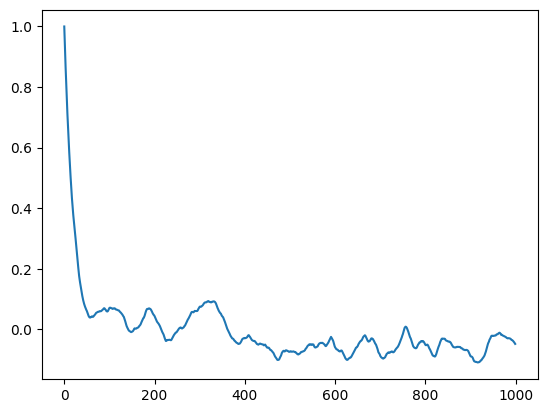

In [10]:
# 자기 상관 함수
S = Series(x_list)

acf_0_5 = []
for k in range(0, 1000) :
    acf_0_5.append(S.autocorr(k))
# print(acf_0_5)
plt.plot(acf_0_5)

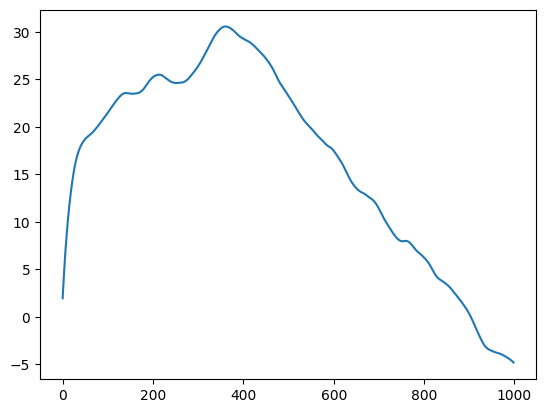

In [11]:
# 상관시간
tau_0_5 = []
tau = S.autocorr(0)
for k in range(1,1000) :
    tau += S.autocorr(k)
    tau_0_5.append(tau)
# print(tau_0_5)
plt.plot(tau_0_5)

# s = 100

In [12]:
# s = 100 인 상황
def q(x, x_star, s = 100) :
    return 1/s * np.exp( -(x-x_star) / s) * np.exp( -np.exp( -(x-x_star)/s))

0.01201


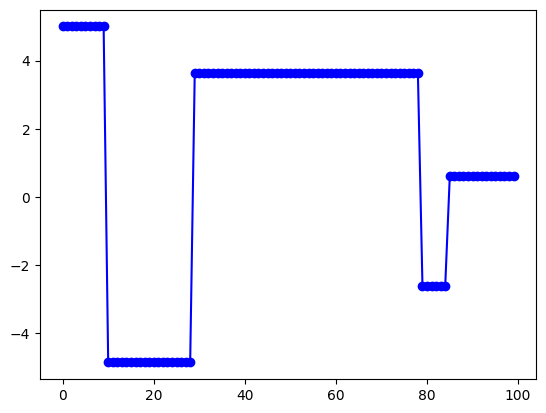

In [13]:
T = 100000
x = 5
x_list = [5]
count = 0

for i in range(T):
    x_star = np.random.gumbel(x ,100) # q(x) 함수에서 뽑은거
    u = np.random.uniform(0,1)
    if u <= alpha(x, x_star) :
        x_list.append(x_star)
        x = x_star
        count += 1
    else :
        x_list.append(x)

accept_100 = count / T
print(accept_100)

plt.plot(x_list[:100],'bo-')  #burn-in 제외하고 그리기
plt.show()

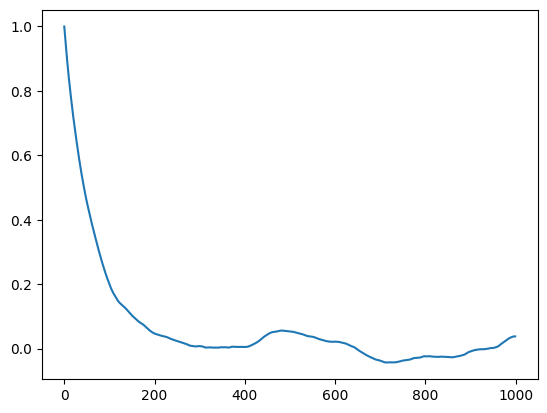

In [14]:
# 자기 상관 함수
S = Series(x_list)

acf_100 = []
for k in range(0, 1000) :
    acf_100.append(S.autocorr(k))
# print(acf_0_5)
plt.plot(acf_100)

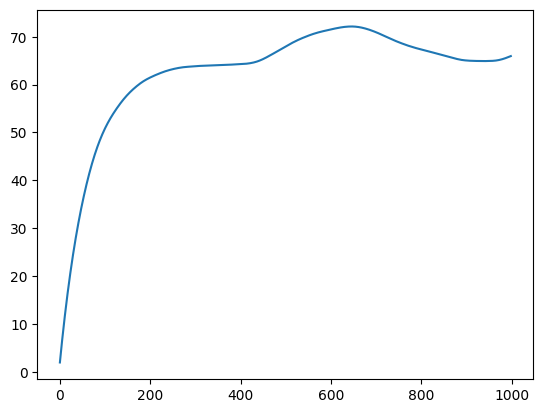

In [20]:
# 상관시간
tau_100 = []
tau = S.autocorr(0)
for k in range(1,1000) :
    tau += S.autocorr(k)
    tau_100.append(tau)
# print(tau_100)
plt.plot(tau_100)

# 한번에 보이기

In [16]:
# acceptance ratio
print("s = 0.1 : ", accept_0_1, ", s = 0.5 : ", accept_0_5, ", s = 100 : " , accept_100)

s = 0.1 :  0.7416 , s = 0.5 :  0.6981 , s = 100 :  0.01201


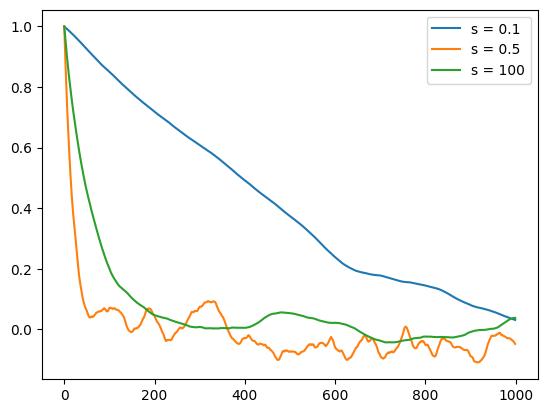

In [17]:
# 자기상관함수 도표
plt.plot(acf_0_1, label = 's = 0.1')
plt.plot(acf_0_5, label = 's = 0.5')
plt.plot(acf_100, label = 's = 100')
plt.legend()
plt.show()

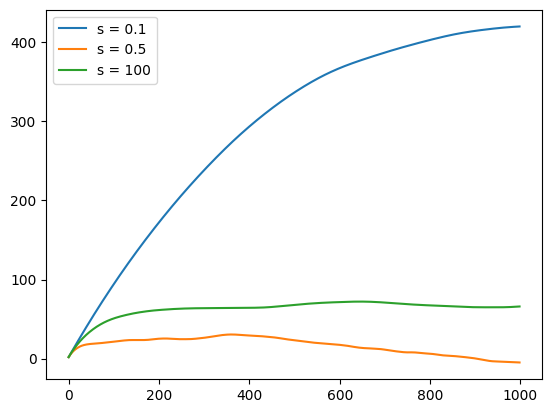

In [21]:
# 상관시간
plt.plot(tau_0_1, label = 's = 0.1') #점근선은 420 추정
plt.plot(tau_0_5, label = 's = 0.5') #점근선은 34로 추정
plt.plot(tau_100, label = 's = 100') #점근선은 73 추정
plt.legend()
plt.show()